# IBM HR Analytics Employee Attrition & Performance
# ML, EDA, FA Project using Python


In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Step 2: Load Dataset
df = pd.read_csv("C:/Users/LENOVO/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [7]:
# Step 3: Data Preprocessing
print("Initial Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicated values:", df.duplicated().sum())

# Drop constant columns
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

# Convert target variable to binary
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes = 1, No = 0

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Initial Shape: (1470, 35)
Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany             

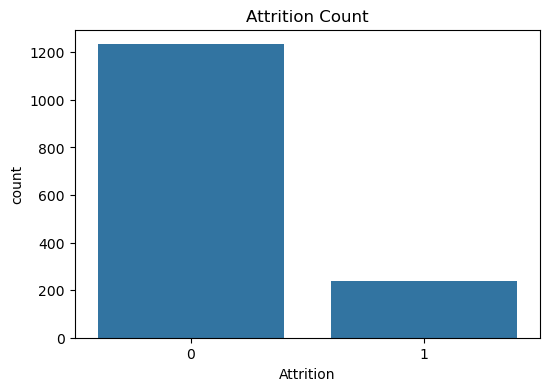

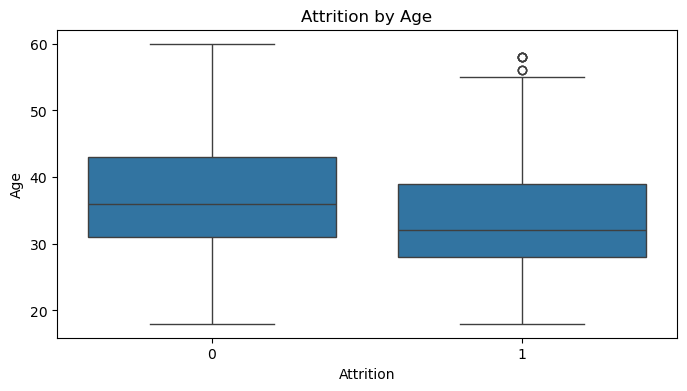

In [9]:
# Step 4: EDA Examples
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition by Age')
plt.show()


In [11]:
# Step 5: Feature and Target Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [13]:
# Step 6: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [15]:
# Step 7: Model Training with Grid Search (Decision Tree)
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


Confusion Matrix:
 [[239   8]
 [ 38   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



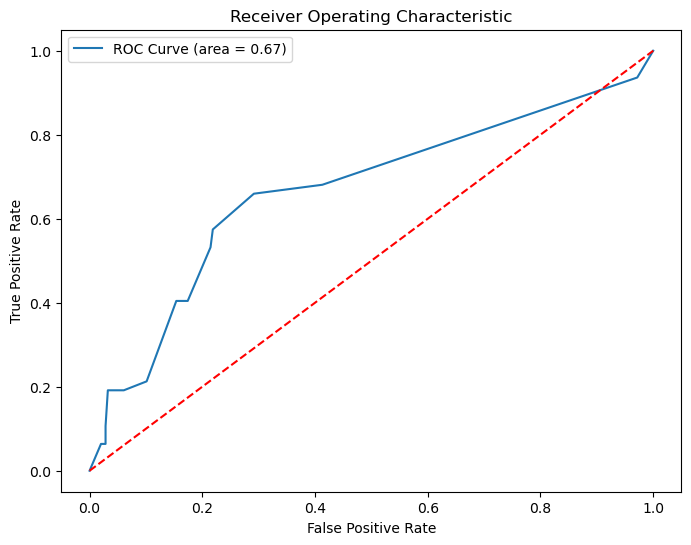

In [17]:
# Step 8: Evaluation
pred = best_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# ROC Curve
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


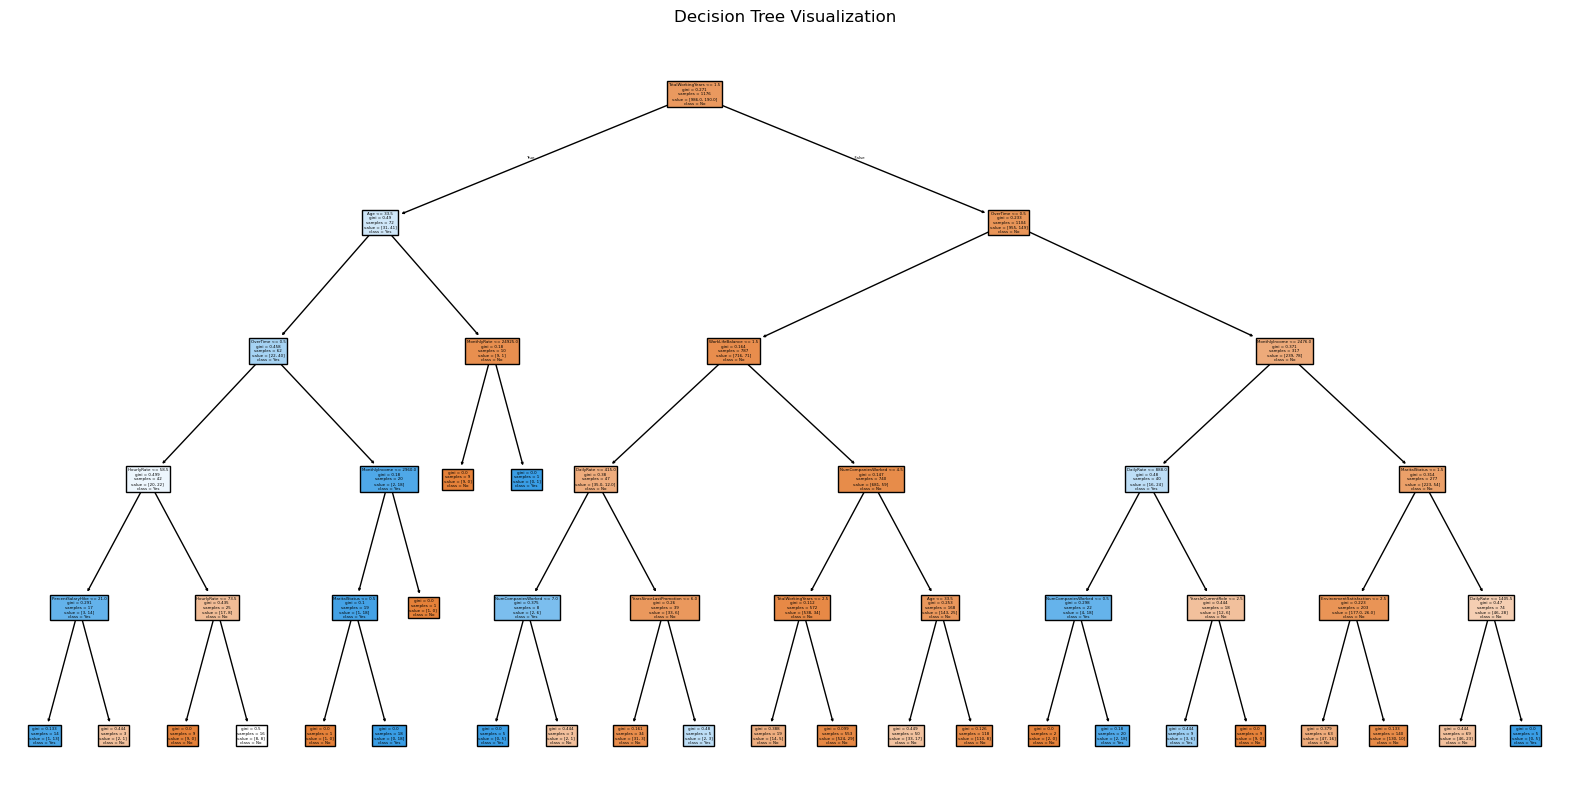

In [19]:
# Step 9: Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()